In [1]:
import json
import csv
#with open('/Users/mjdioli/Documents/STK-IN5000/ml-society-science/src/project-2/final_analysis.json') as json_file:
    #data = json.load(json_file)
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt

from TestRecommender import fixed_treatments, final_full_analysis, test_exploration

In [2]:
#Test exploration
np.random.seed(1)
results = test_exploration(5000, epsilons = 25)

Epsilon =  0.0
- Start fitting treatment outcomes
  0%|          | 7/5000 [00:00<01:19, 62.97it/s]- Stop fitting treatment outcomes
Testing for  5000 steps
100%|██████████| 5000/5000 [02:12<00:00, 37.68it/s]
Epsilon =  0.020833333333333332
- Start fitting treatment outcomes
  0%|          | 5/5000 [00:00<01:56, 42.70it/s]- Stop fitting treatment outcomes
Testing for  5000 steps
100%|██████████| 5000/5000 [01:46<00:00, 47.05it/s]
Epsilon =  0.041666666666666664
- Start fitting treatment outcomes
  0%|          | 5/5000 [00:00<01:46, 47.09it/s]- Stop fitting treatment outcomes
Testing for  5000 steps
100%|██████████| 5000/5000 [01:58<00:00, 42.25it/s]
Epsilon =  0.0625
- Start fitting treatment outcomes
  0%|          | 6/5000 [00:00<01:31, 54.50it/s]- Stop fitting treatment outcomes
Testing for  5000 steps
100%|██████████| 5000/5000 [01:51<00:00, 44.79it/s]
Epsilon =  0.08333333333333333
- Start fitting treatment outcomes
  0%|          | 5/5000 [00:00<01:51, 44.75it/s]- Stop fitting tr

In [8]:
scores = []
for k, v in results.items():
    scores += [sum(v)/len(v)]

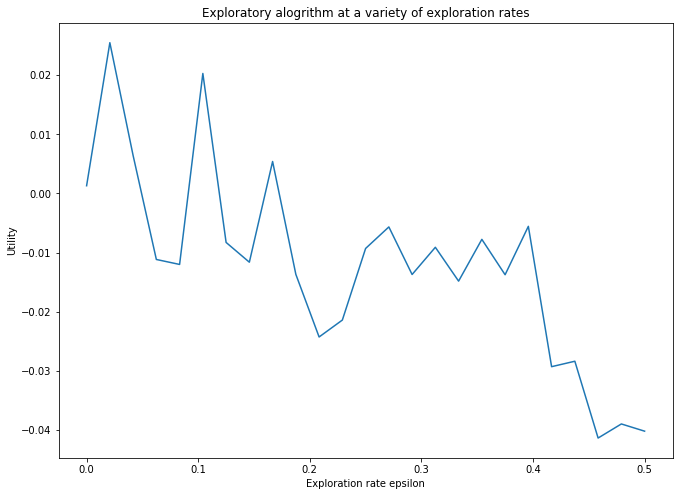

In [9]:
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.plot(np.linspace(0, 0.5, 25) ,scores)
plt.title("Exploratory alogrithm at a variety of exploration rates")
plt.xlabel("Exploration rate epsilon")
plt.ylabel("Utility")
fig.savefig("./img/exploration.png")
plt.show()

In [ ]:
return_dict = fixed_treatments(n_tests=10000)


ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

In [ ]:

counter = 1
for key, value in return_dict.items():
    print(counter)
    sum_val = sum(value[0])
    mean_val  = sum(value[0])/len(value[0])
    covars = value[1]
    covars = covars.loc[covars["y"]==1.0]
    s = covars.sum()
    covars = covars[s.sort_values(ascending=False).index]
    covars.drop(["sex", "smoker", "y", "symptom 1", "symptom 2"], axis=1, inplace=True)
    covars.head()
    top5 = covars.iloc[:,:5]
    bot5 = covars.iloc[:,-5:]
    top5.head()
    print("Action: ", key)
    #print("Sum of utilities: ", sum_val )
    if sum_val>500:
        print("large utility: ", sum_val, key)
    #print("Mean of utilities: ", mean_val )
    #print(list(top5.index)+list(bot5.index))
    fig = plt.gcf()
    fig.set_size_inches(11,8)
    plt.bar(list(top5.columns)+list(bot5.columns), list(top5.sum())+list(bot5.sum()))
    plt.title(key)
    plt.show()
    counter +=1

In [ ]:
sorted_sum = {k: sum(v[0]) for k, v in sorted(return_dict.items(), key=lambda item: item[1])}
sorted_sum = {k: v for k, v in sorted(sorted_sum.items(), key=lambda item: item[1])}

In [ ]:
for ind, (k,v) in enumerate(sorted_sum.items()):
    if ind == 1 or ind ==50:
        sum_val = sum(value[0])
        mean_val  = sum(value[0])/len(value[0])
        covars = value[1]
        covars = covars.loc[covars["y"]==1.0]
        s = covars.sum()
        covars = covars[s.sort_values(ascending=False).index]
        covars.drop(["sex", "smoker", "y", "symptom 1", "symptom 2"], axis=1, inplace=True)
        covars.head()
        top5 = covars.iloc[:,:5]
        bot5 = covars.iloc[:,-5:]
        top5.head()
        print("Action: ", key)
        #print("Sum of utilities: ", sum_val )
        if sum_val>500:
            print("large utility: ", sum_val, key)
        #print("Mean of utilities: ", mean_val )
        #print(list(top5.index)+list(bot5.index))
        fig = plt.gcf()
        fig.set_size_inches(11,8)
        plt.bar(list(top5.columns)+list(bot5.columns), list(top5.sum())+list(bot5.sum()))
        plt.title(key)
        plt.xlabel("Genes")
        plt.ylabel("Frequency")
        plt.show()
        fig.savefig("./img/gene_frequency"+key+".png")


In [ ]:
scores = []
models = []
for ind, (k,v) in enumerate(sorted_sum.items()):
    if ind<10:
        model = "Fixed policy " + k[-1]
        sum_val = sum(value[0])
        mean_val  = sum(value[0])/len(value[0])
        models += [model]
        scores += [mean_val]
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.bar(models, scores)
plt.title("Comparison of the scores of the best fixed policies")
plt.xlabel("Policy")
plt.ylabel("Score")
plt.show()
fig.savefig("./img/fixed_scores")